In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.visualization import hist
import lsst.alert.packet as ap 
schema = ap.Schema.from_file() 

In [158]:
def qp(d, Xstr, Xmin, Xmax, Ystr, Ymin, Ymax, symbolSize=0.01):
    ax = plt.axes()
    ax.set_xlabel(Xstr)
    ax.set_ylabel(Ystr)
    ax.scatter(d[Xstr], d[Ystr], s=symbolSize, c='blue')  
    ax.set_xlim(Xmin, Xmax)
    ax.set_ylim(Ymin, Ymax)
    plt.show()
    return

def qphist(arr, xMin, xMax, xLabel, verbose = False):
    ax = plt.axes()
    arrOK = arr[(arr>=xMin)&(arr<=xMax)]
    hist(arrOK, bins='knuth', ax=ax, histtype='stepfilled', ec='k', fc='#AAAAAA')
    ax.set_xlabel(xLabel)
    ax.set_ylabel('n')
    ax.set_xlim(xMin, xMax)
    plt.show()
    if (verbose):
        print('Min, max: ', np.min(arrOK),np.max(arrOK)) 
        print('Mean, median: ', np.mean(arrOK),np.median(arrOK)) 
        # print('sigG, st.dev.: ', sigG(arrOK),np.std(arrOK)) 
    return 

In [182]:
DIAcolumns = ['diaSourceId', 'ccdVisitId', 'midPointTai', 'filterName', 'ra', 'decl', 'x', 'y', 
           'totFlux', 'totFluxErr', 'ixxPSF', 'iyyPSF', 'ixyPSF', 'flags']
columns = ['counter'] + DIAcolumns 

In [219]:
firstDF = True
i = 0
# for data files, see 
# https://lsst.ncsa.illinois.edu/~ebellm/sample_precursor_alerts/2020-07-15/DECam-HiTS/
#alertfile = 'latest_single_ccd_sample.avro'
alertfile = 'latest_single_visit_sample.avro'
packetList = []
with open(alertfile,'rb') as f: 
   writer_schema, packet_iter = schema.retrieve_alerts(f) 
   for packet in packet_iter: 
       packetList.append(packet)
       ex_dict['counter'] = i
       for k in DIAcolumns: 
            ex_dict[k] = packet['diaSource'][k]
       newDF = pd.DataFrame(ex_dict, columns=columns, index=[i])   
       if (firstDF):
            df = newDF
            firstDF = False
       else:     
            df = pd.concat([df, newDF])
       # print('i=', i, packet['diaSource']['diaSourceId']) 
       # print('i=', i, np.size(df))
       i += 1
# the SNR should be computed with the DIASource flux, not total flux...
df['SNR'] = df['totFlux']/df['totFluxErr']

{'ccdVisitId': 42159001, 'midPointTai': 57095.171263959775, 'filterName': 'g', 'ra': 149.67531687379204, 'decl': 3.186128403921966, 'x': 72.68359375, 'y': 187.0650634765625, 'totFlux': -464.1431579589844, 'totFluxErr': 249.4888916015625, 'ixxPSF': 4.268840789794922, 'iyyPSF': 2.7272262573242188, 'ixyPSF': 0.4369075298309326, 'flags': 25168072, 'counter': 10, 'diaSourceId': 181071530527032001}


In [220]:
df

,counter,diaSourceId,ccdVisitId,midPointTai,filterName,ra,decl,x,y,totFlux,totFluxErr,ixxPSF,iyyPSF,ixyPSF,flags,SNR
0,0,181071530527031991,42159001,57095.171264,g,149.662784,3.170722,283.963684,15.753110,14148.8,296.449,4.268841,2.727226,0.436908,25299144,47.7277
1,1,181071530527031992,42159001,57095.171264,g,149.663232,3.129883,843.812134,22.147133,14569.2,288.408,4.268841,2.727226,0.436908,25299144,50.5158
2,2,181071530527031993,42159001,57095.171264,g,149.663831,3.181797,132.110107,30.061293,-30.0513,251.61,4.268841,2.727226,0.436908,25168072,-0.119436
3,3,181071530527031994,42159001,57095.171264,g,149.663992,3.050969,1925.962646,33.947418,105.769,316.509,4.268841,2.727226,0.436908,25168328,0.334175
4,4,181071530527031995,42159001,57095.171264,g,149.667124,3.178002,184.141769,75.084183,821485,1166.6,4.268841,2.727226,0.436908,924,704.171
5,5,181071530527031996,42159001,57095.171264,g,149.665791,3.182319,124.939072,56.849865,4661.29,304.755,4.268841,2.727226,0.436908,2504,15.2952
6,6,181071530527031997,42159001,57095.171264,g,149.666596,3.185892,75.944504,67.866898,-77.0196,324.302,4.268841,2.727226,0.436908,25168332,-0.237494
7,7,181071530527031998,42159001,57095.171264,g,149.668569,3.156205,482.987488,94.889664,-6.37097,249.737,4.268841,2.727226,0.436908,25165824,-0.0255108
8,8,181071530527031999,42159001,57095.171264,g,149.673405,3.094498,1329.098511,161.859344,51960,392.599,4.268841,2.727226,0.436908,25165896,132.349
9,9,181071530527032000,42159001,57095.171264,g,149.675418,3.072745,1627.467163,189.833176,309180,775.683,4.268841,2.727226,0.436908,25165824,398.591


-241.97038333532618 2004.8335400748892


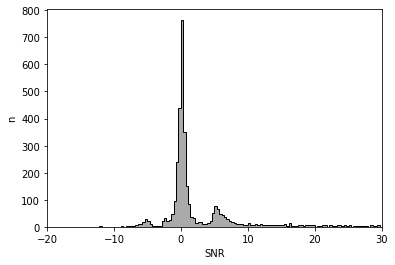

Min, max:  -18.679990179452094 29.703365352843075
Mean, median:  2.2648682900298085 0.21445715311920843


In [221]:
print(np.min(df['SNR']), np.max(df['SNR']))
qphist(df['SNR'], -20, 30, 'SNR', True)    

6734 2390


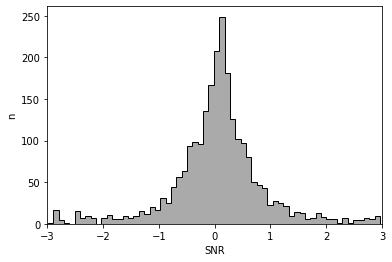

Min, max:  -2.9893450773044465 2.962228661025682
Mean, median:  0.05389153383829958 0.08171018201398475


In [256]:
dfSNR = df[np.abs(df['SNR'])<3]
#dfSNR = df[df['SNR']<-3]
print(df.shape[0], dfSNR.shape[0])
#qphist(dfSNR['SNR'], 5, 100, 'SNR', True)  
qphist(dfSNR['SNR'], -3, 3, 'SNR', True) 

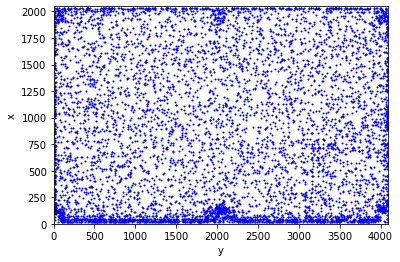

In [254]:
qp(df, 'y', 0, 4096, 'x', 0, 2048, 1) 

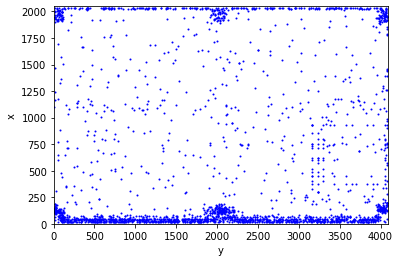

In [257]:
qp(dfSNR, 'y', 0, 4096, 'x', 0, 2048, 1)

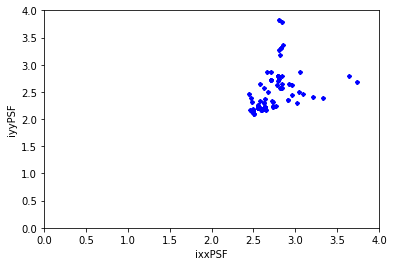

In [225]:
qp(df, 'ixxPSF', 0, 4, 'iyyPSF', 0, 4, 5)

In [227]:
np.min(df['decl']), np.max(df['decl'])

(1.2348681546403772, 3.1901612538899924)

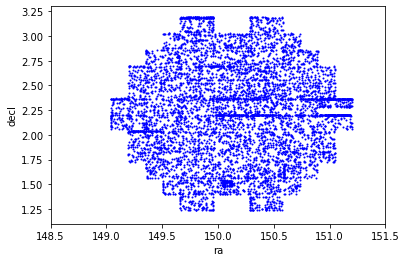

In [228]:
qp(df, 'ra', 148.5, 151.5, 'decl', 1.1, 3.3, 1)

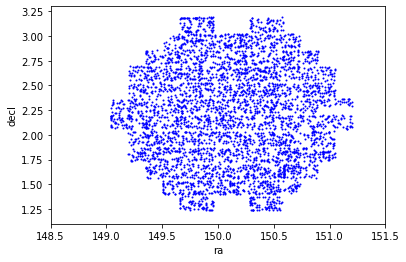

In [229]:
qp(dfSNR, 'ra', 148.5, 151.5, 'decl', 1.1, 3.3, 1)

In [230]:
import io
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits

In [239]:
def plot_cutout(stamp, ax=None, title=None, **kwargs):
    with io.BytesIO(stamp) as image_file:
        if ax is None:
            fig, ax = plt.subplots(1,1, figsize=(4,4))
        image_data = fits.getdata(image_file, ext=0)
        ax.imshow(image_data, cmap='gray')
        ax.set_title(title)
        
def show_stamps(packet, counter=""):
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    for i, cutout in enumerate(['Template','Difference']):
        stamp = packet['cutout{}'.format(cutout)]
        if ((i==0)&(counter!="")):
            title = 'i =' + str(counter) + ' ' + cutout
        else:
            title = cutout
        plot_cutout(stamp, ax=axes[i], title=title)

# show stamps for a DataFrame subset
def ssDF(df, packetList):
    for i in range(0,df.shape[0]):
        counter = df.counter.iloc[i] 
        show_stamps(packetList[counter], counter)
    return

In [235]:
dfSNRhigh = df[(df['SNR']>1000)&(df['SNR']<1030)]
print(dfSNRhigh.shape[0])

34


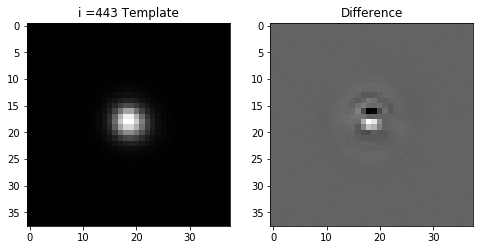

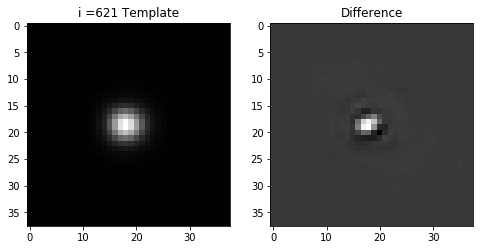

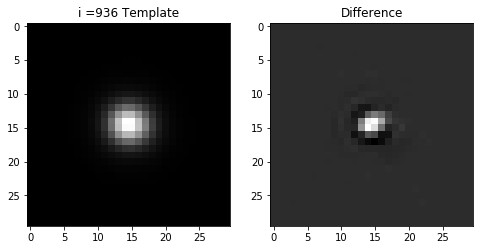

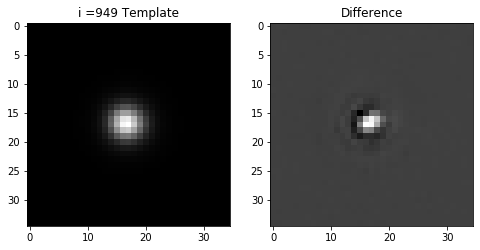

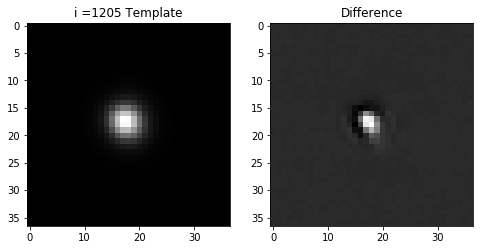

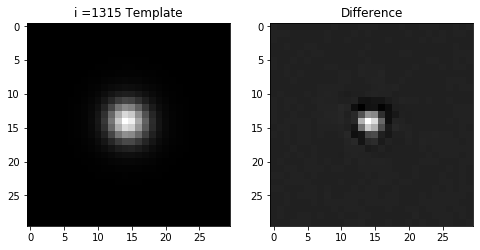

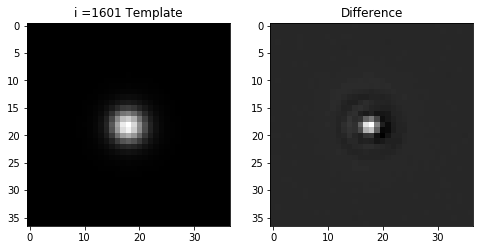

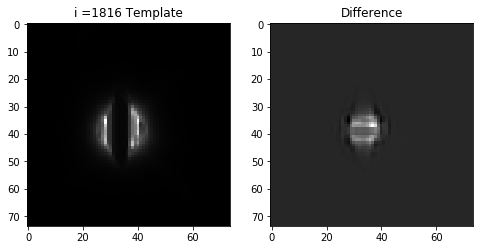

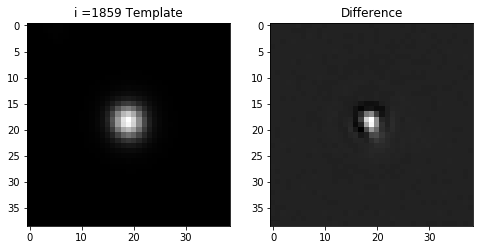

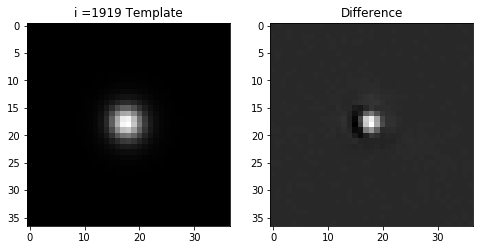

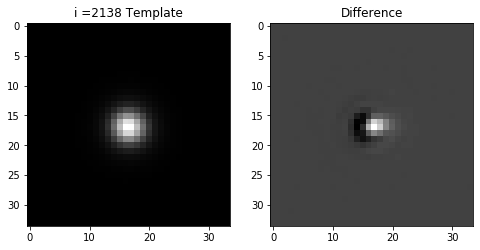

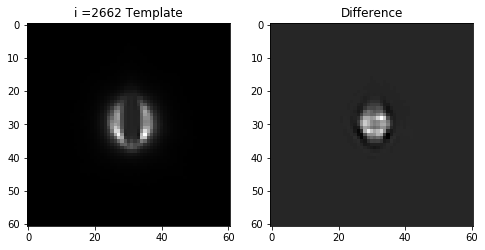

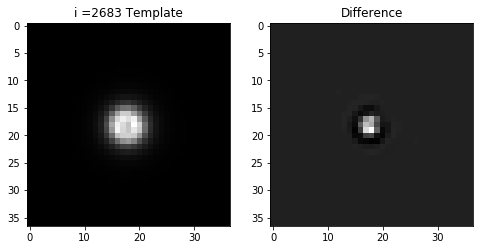

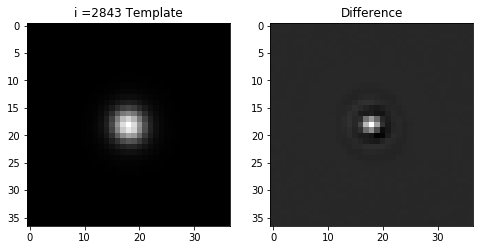

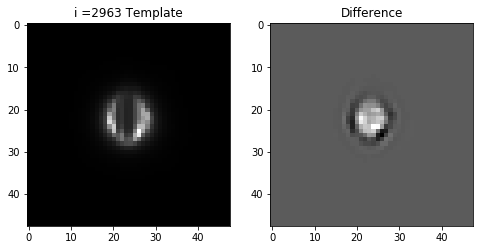

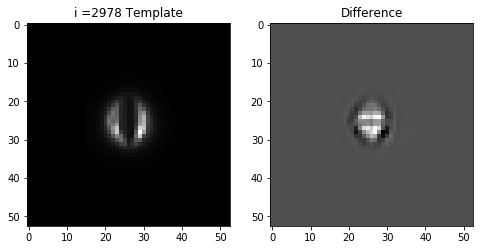

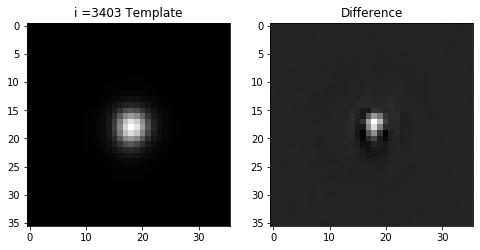

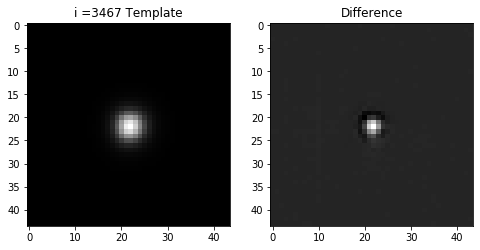

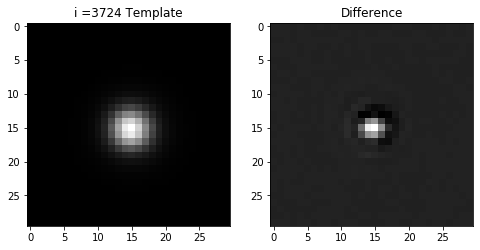

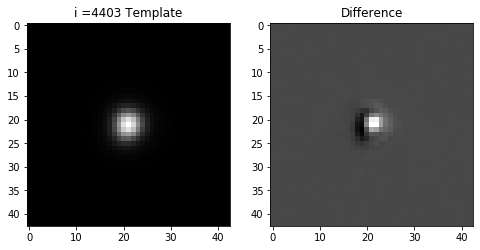

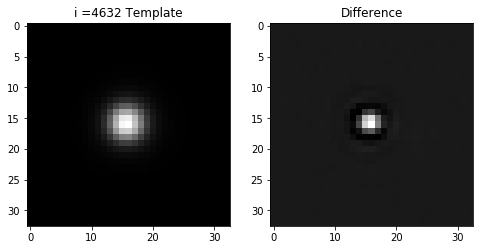

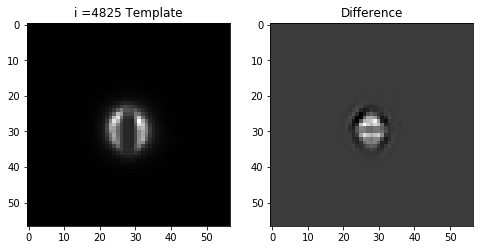

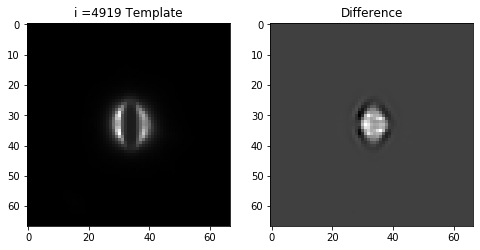

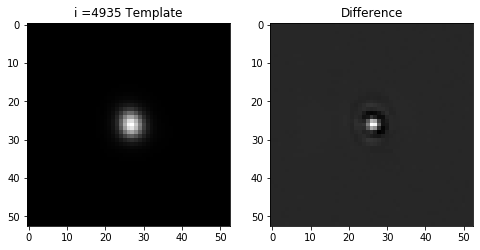

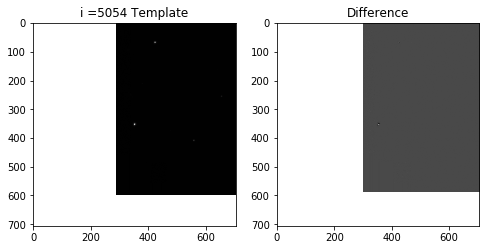

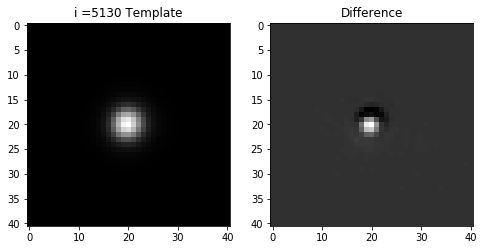

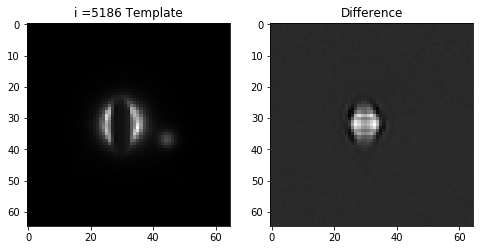

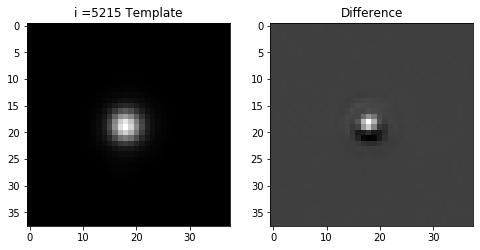

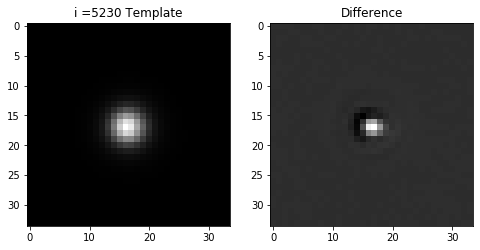

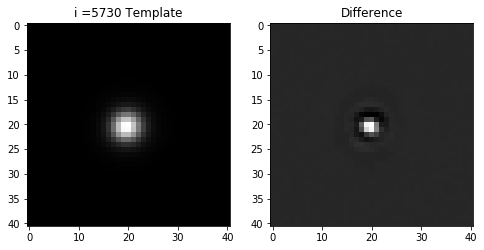

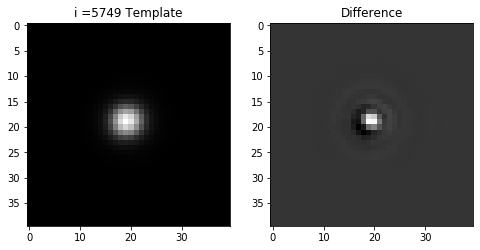

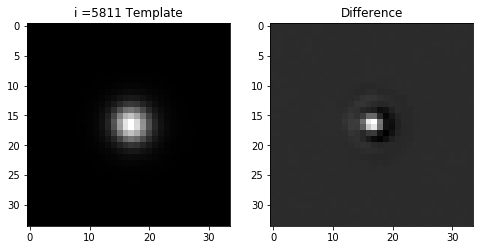

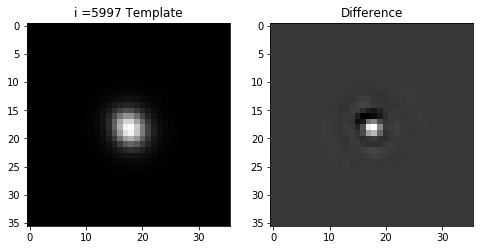

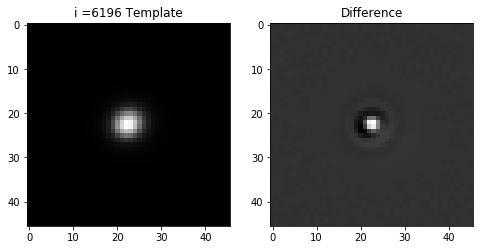

In [236]:
for i in range(0,dfSNRhigh.shape[0]):
    counter = dfSNRhigh.counter.iloc[i] 
    show_stamps(packetList[counter], counter)

In [238]:
dfSNRhigh = df[(df['SNR']>100)&(df['SNR']<105)]
print(dfSNRhigh.shape[0])

31


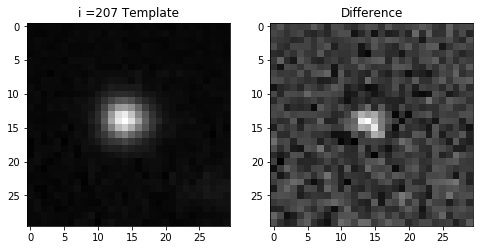

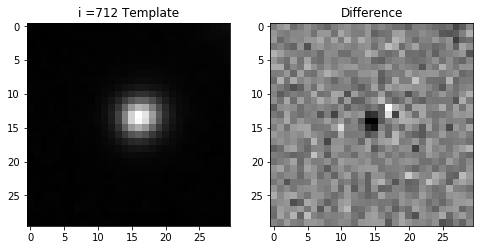

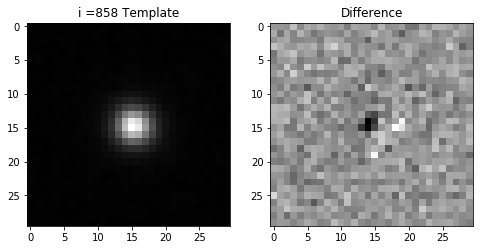

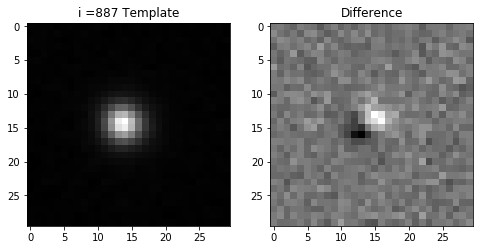

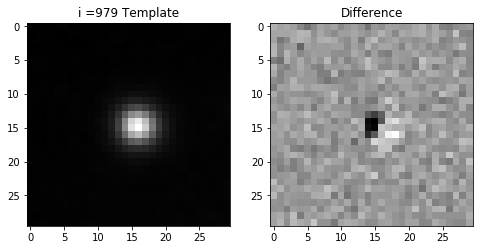

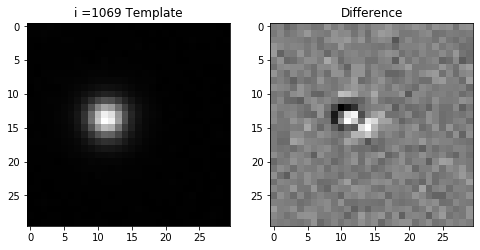

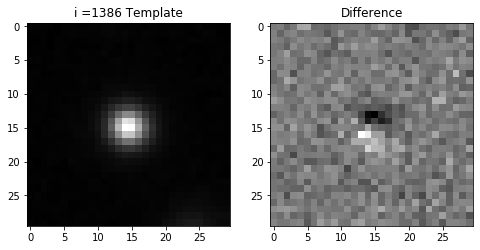

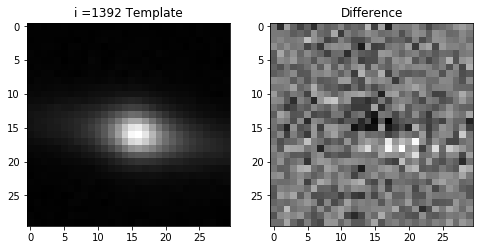

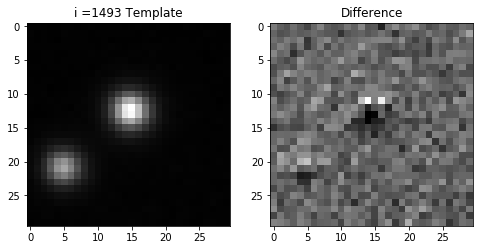

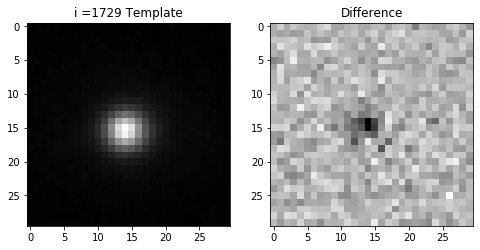

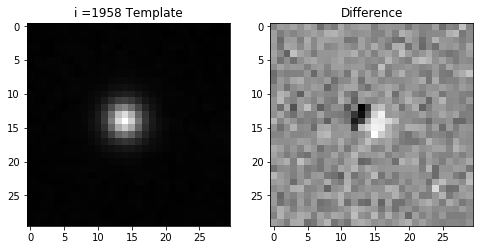

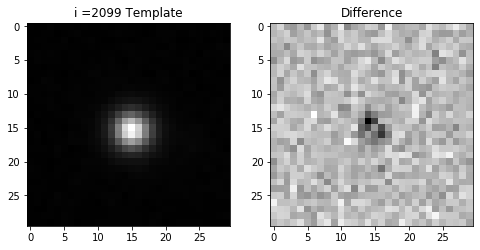

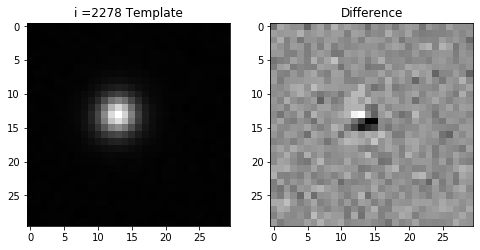

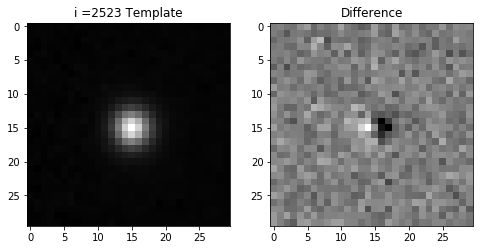

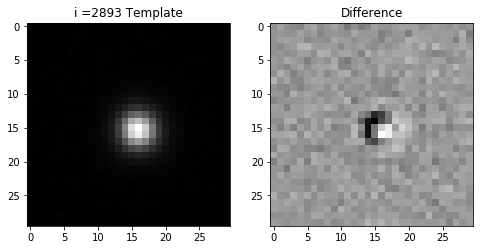

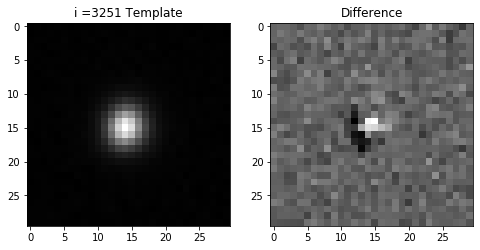

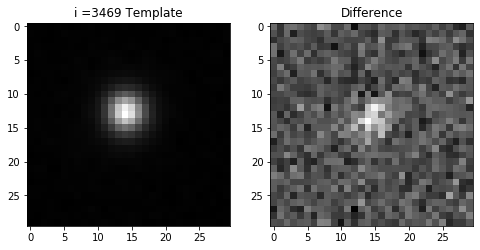

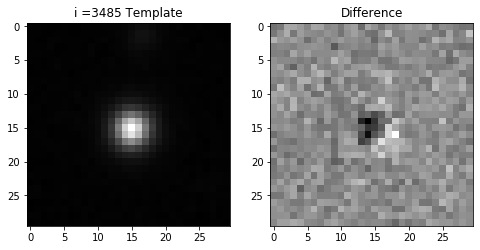

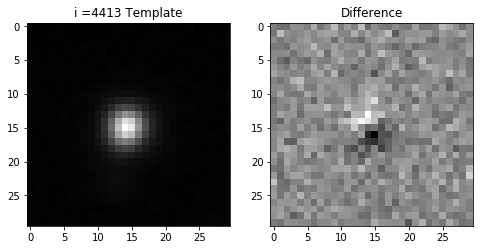

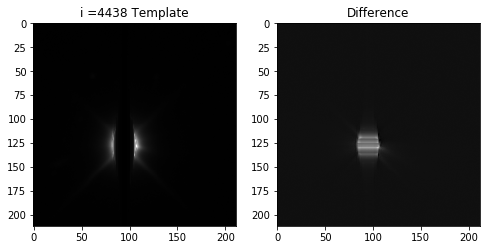

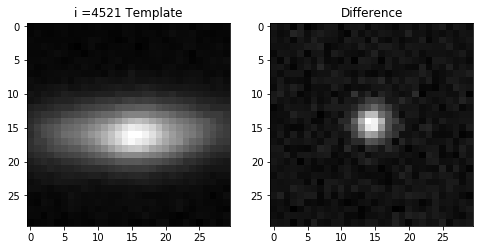

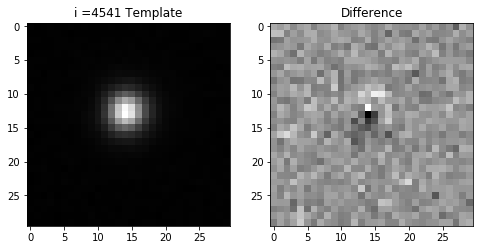

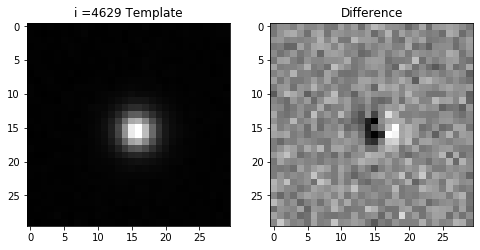

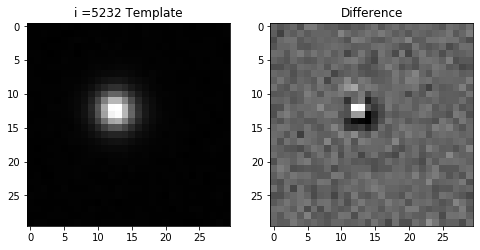

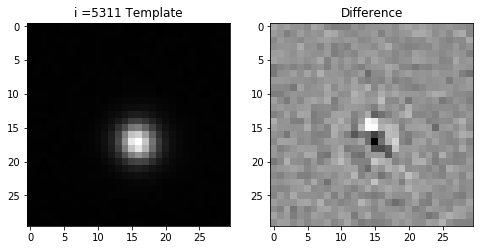

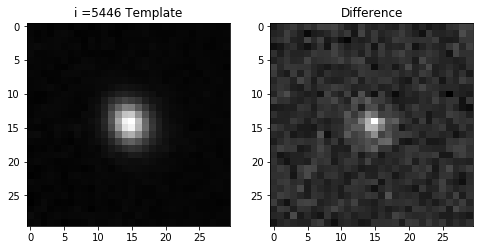

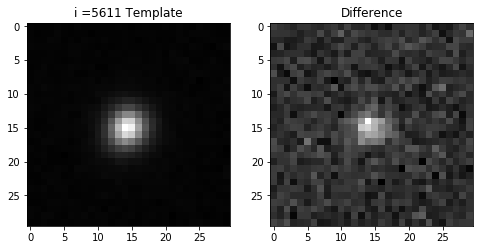

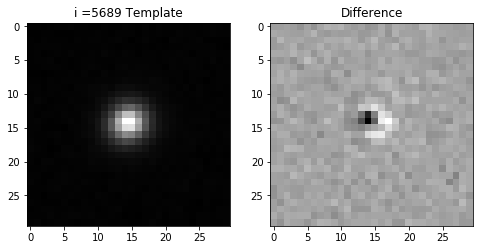

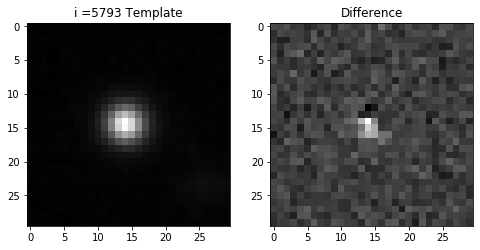

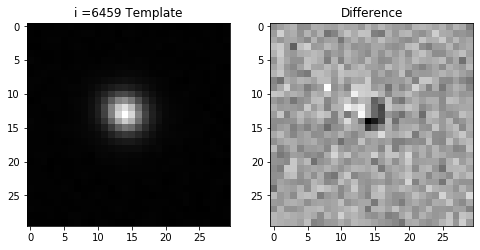

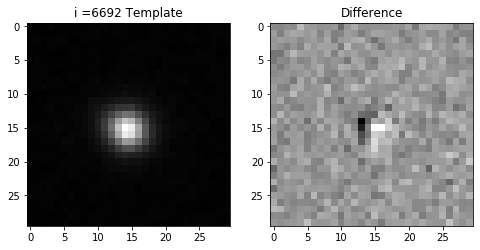

In [240]:
ssDF(dfSNRhigh, packetList)

In [241]:
dfSNRhigh = df[(df['SNR']>10)&(df['SNR']<11)]
print(dfSNRhigh.shape[0])

27


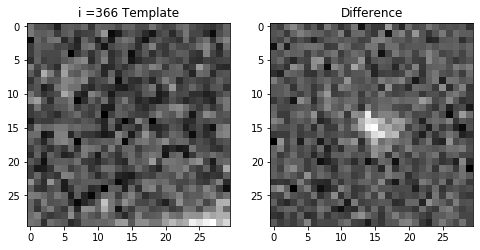

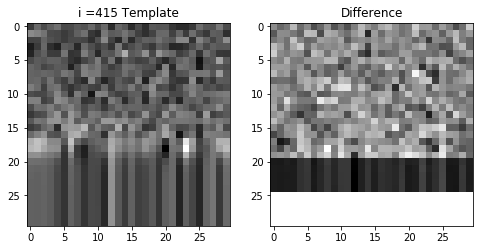

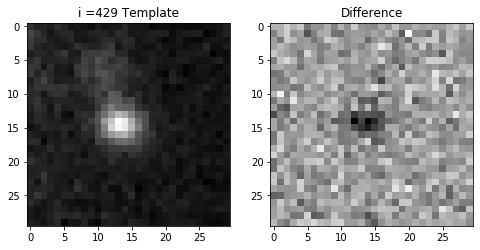

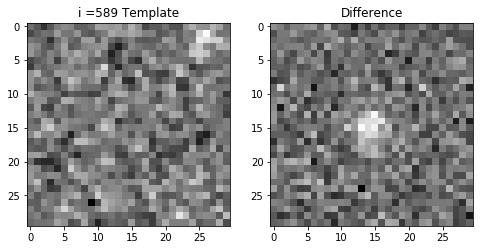

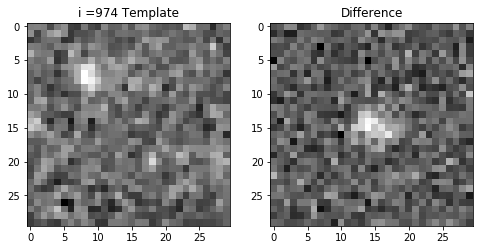

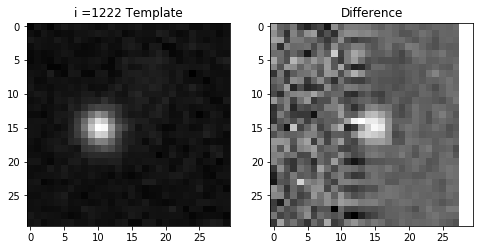

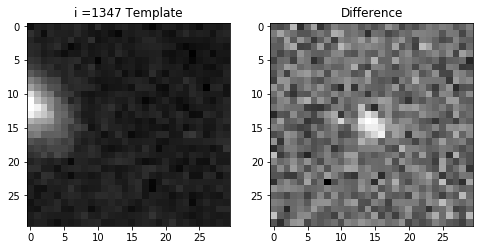

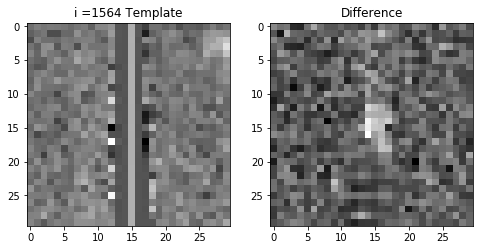

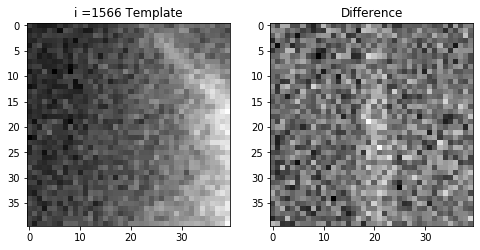

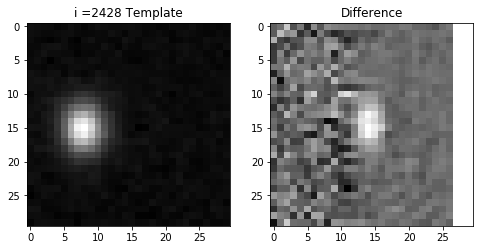

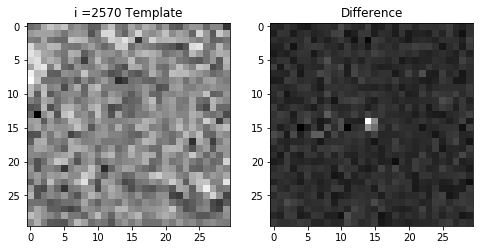

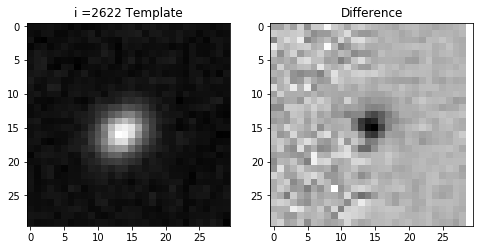

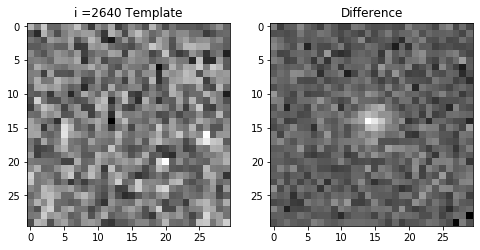

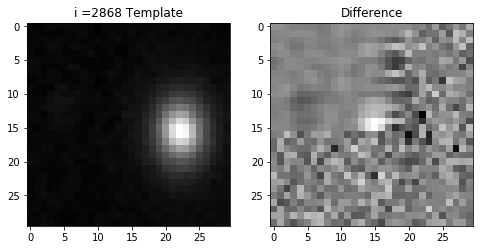

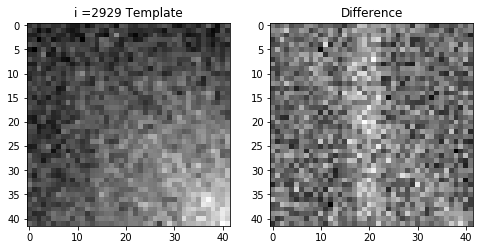

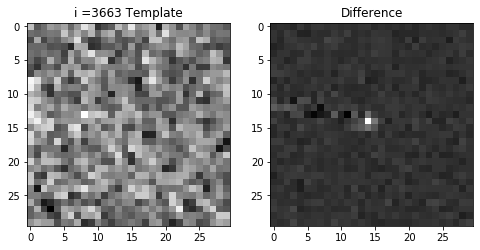

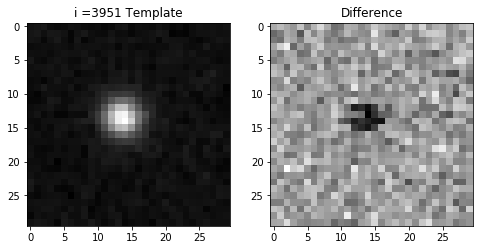

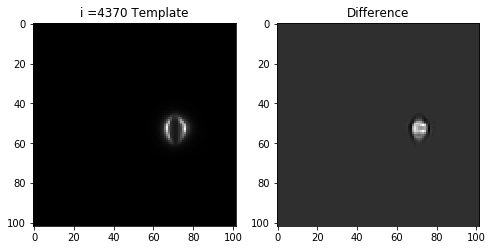

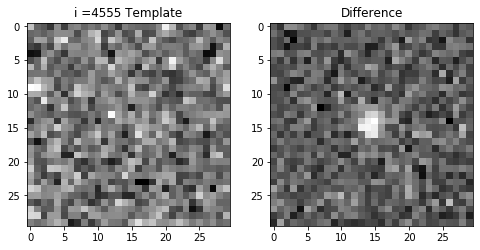

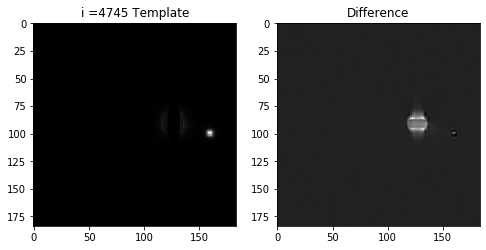

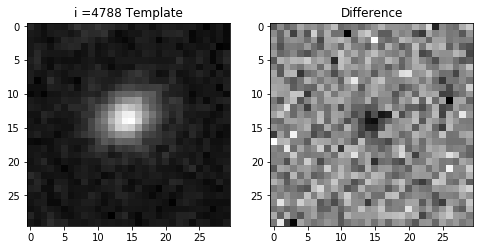

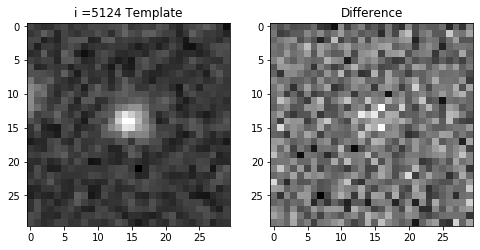

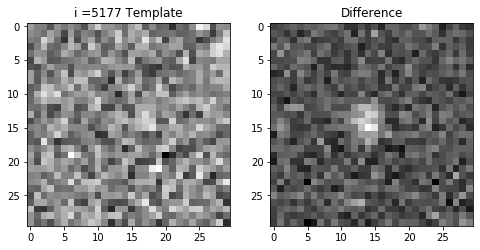

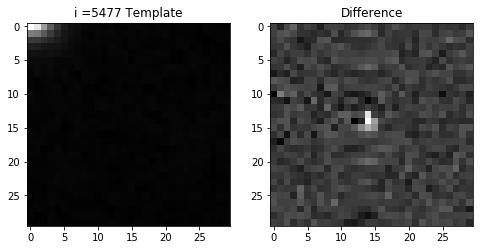

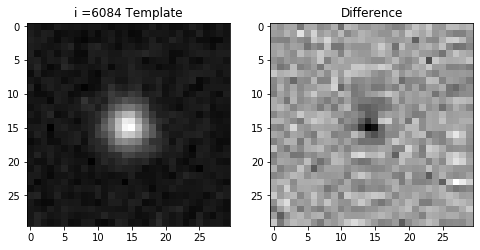

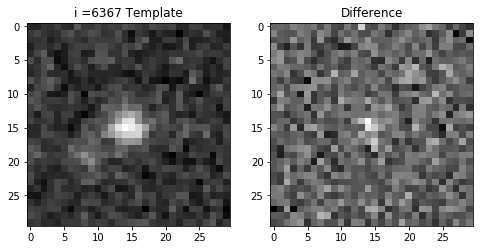

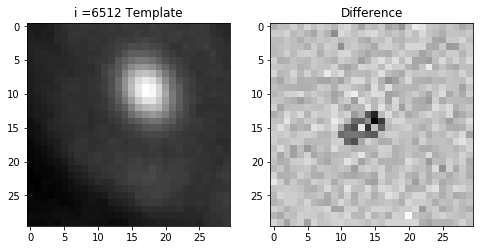

In [242]:
ssDF(dfSNRhigh, packetList)

In [245]:
dfSNRhigh = df[(df['SNR']>-0.01)&(df['SNR']<0.01)]
print(dfSNRhigh.shape[0])

48


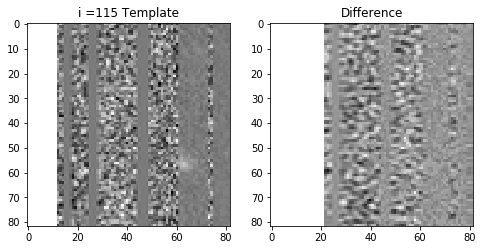

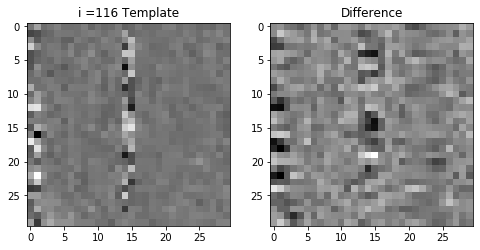

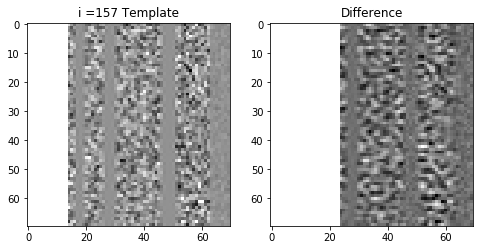

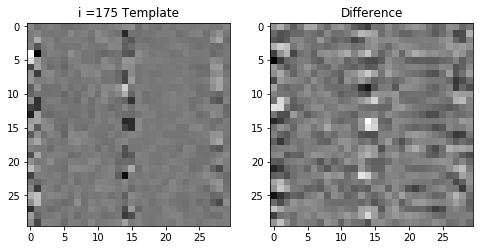

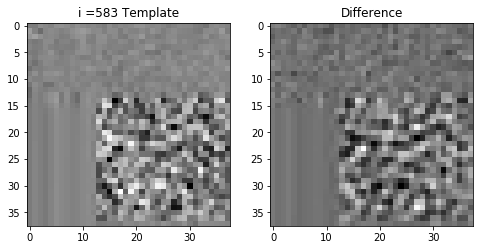

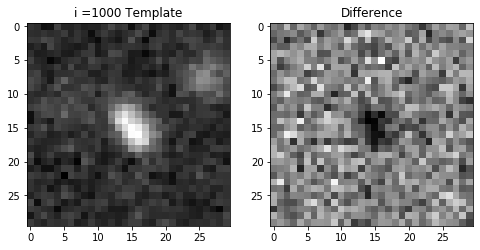

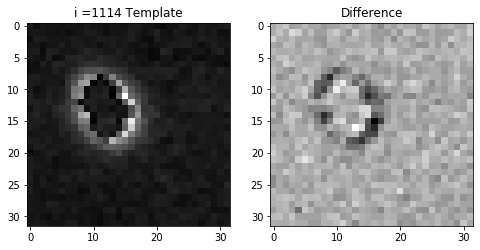

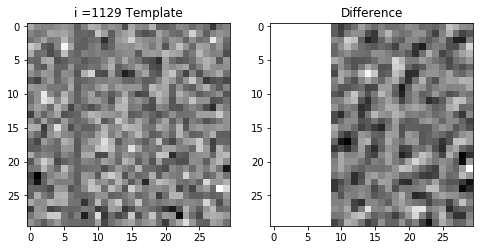

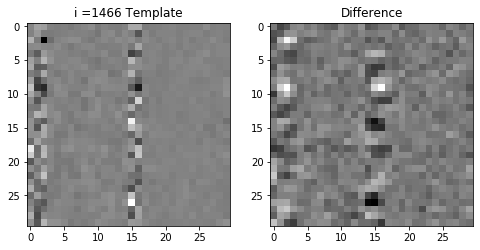

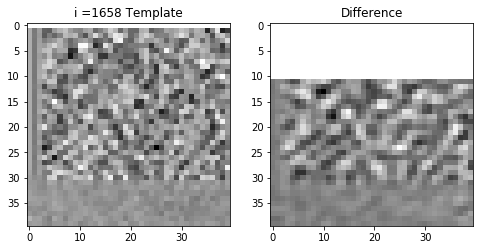

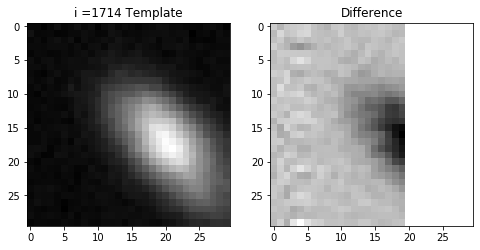

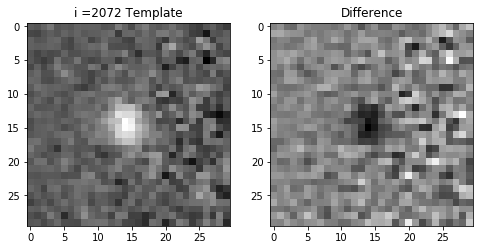

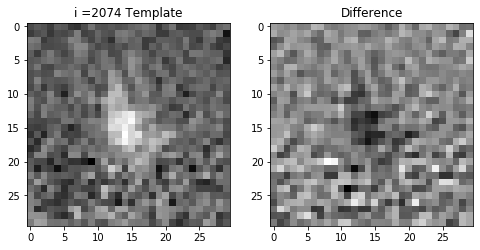

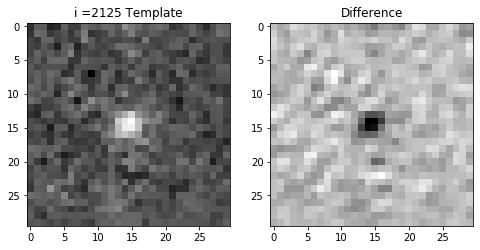

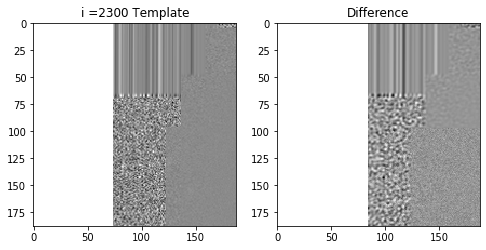

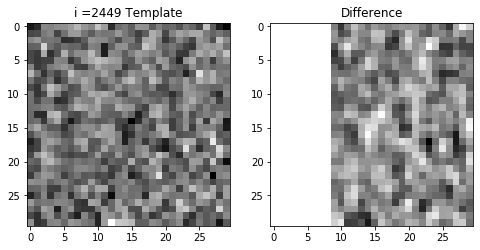

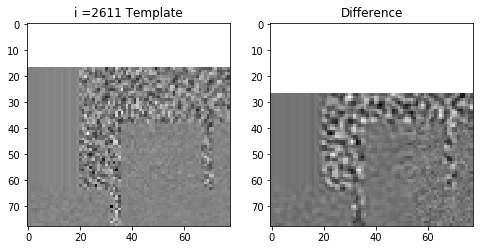

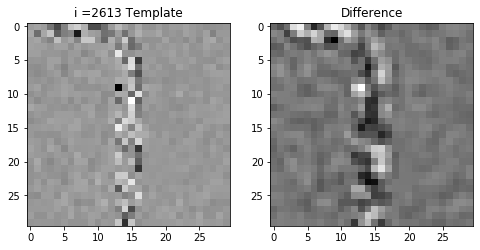

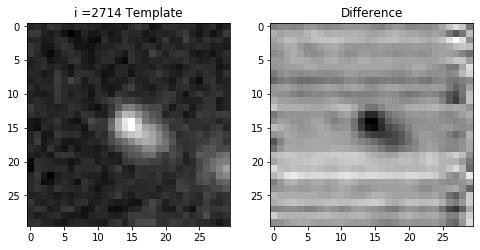

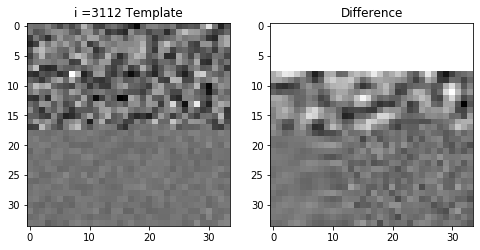

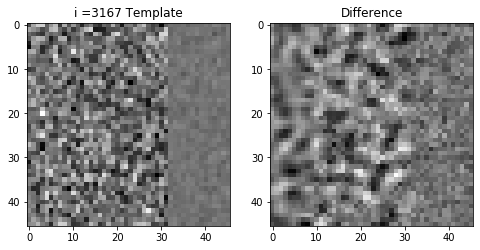

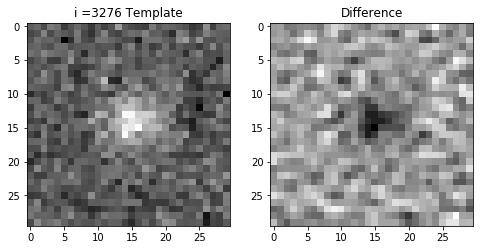

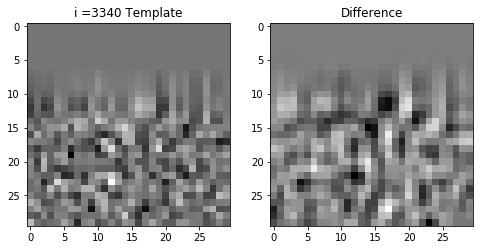

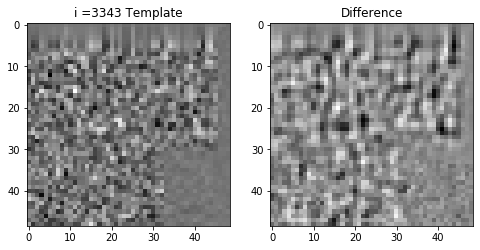

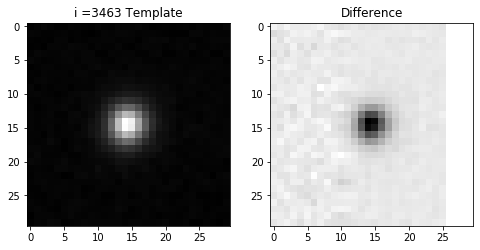

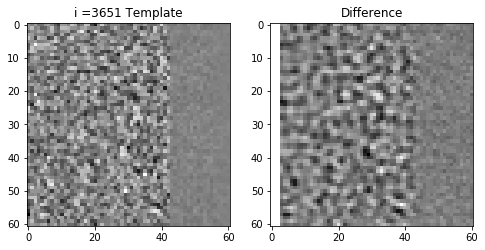

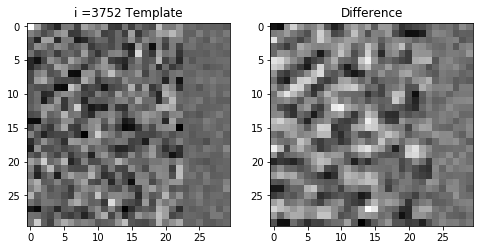

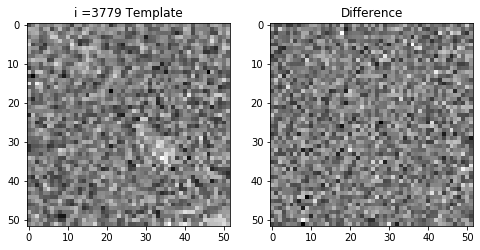

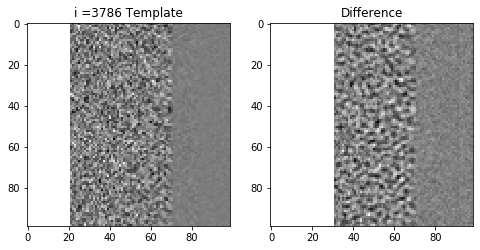

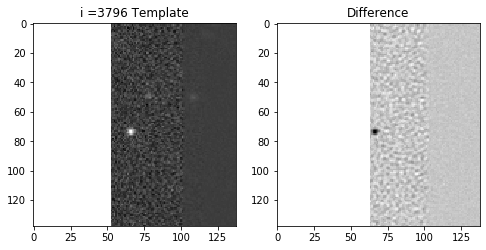

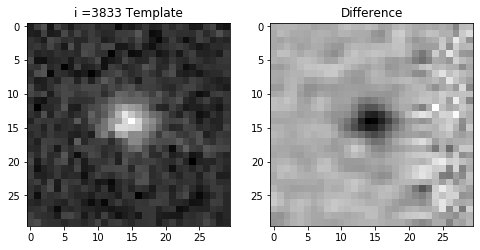

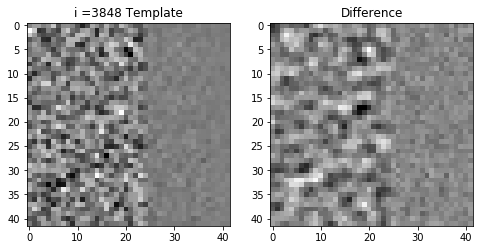

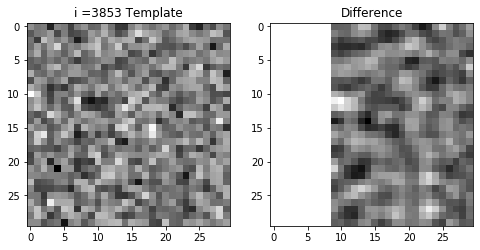

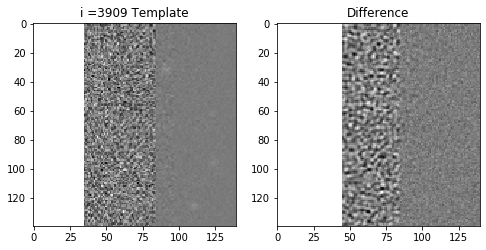

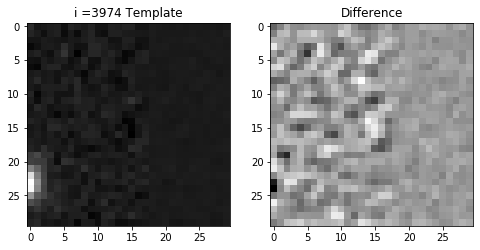

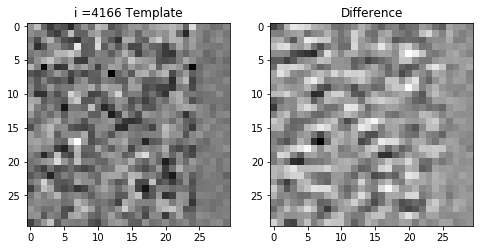

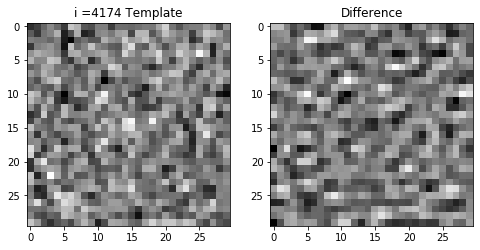

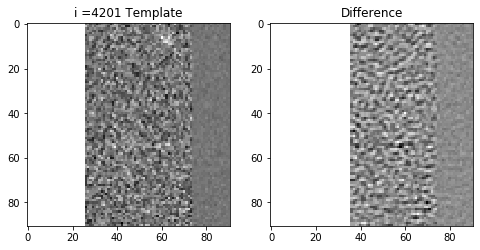

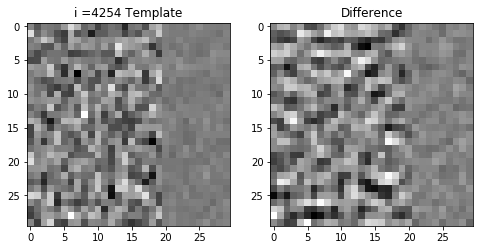

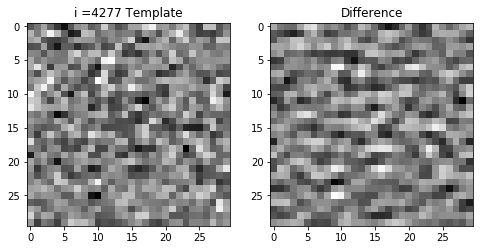

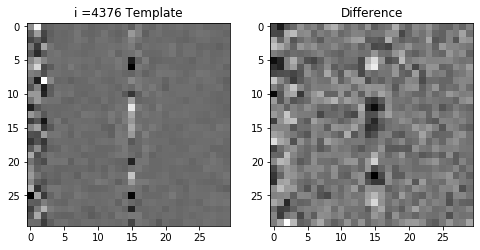

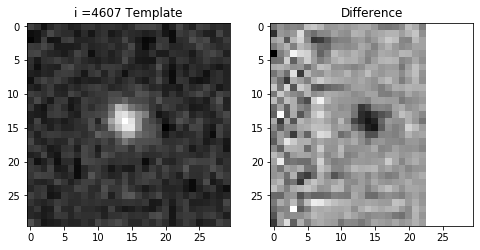

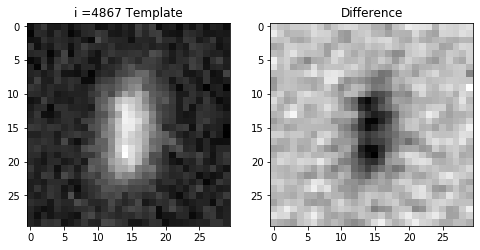

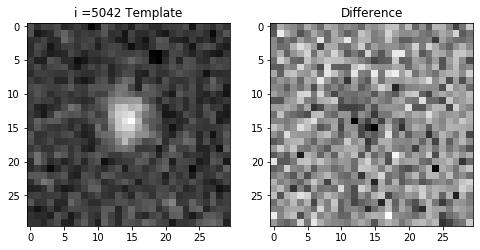

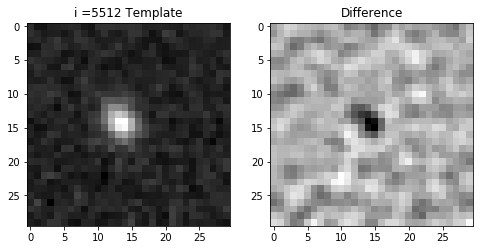

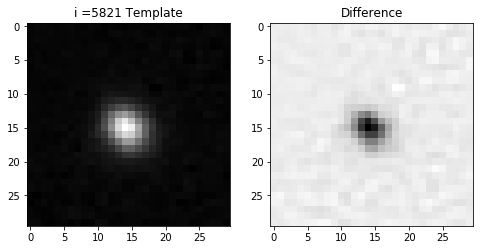

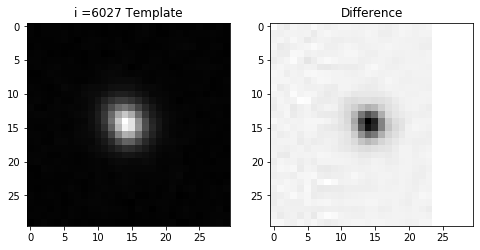

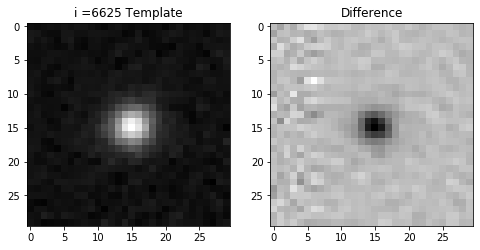

In [246]:
ssDF(dfSNRhigh, packetList)

In [247]:
dfSNRhigh = df[(df['SNR']>-6)&(df['SNR']<-5)]
print(dfSNRhigh.shape[0])

58


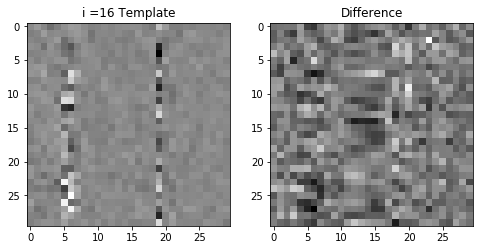

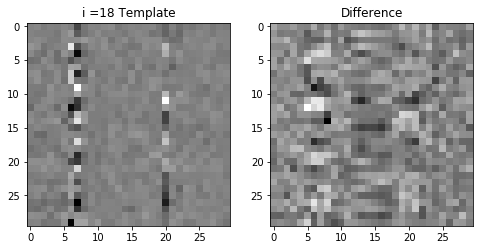

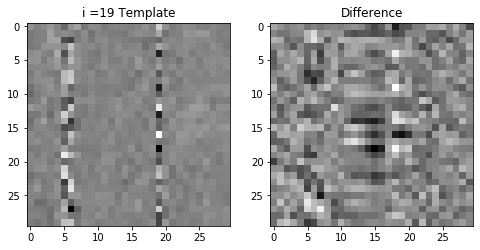

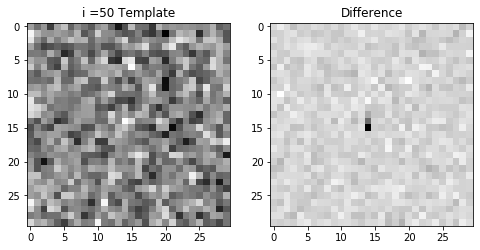

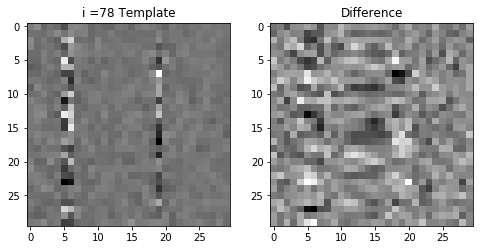

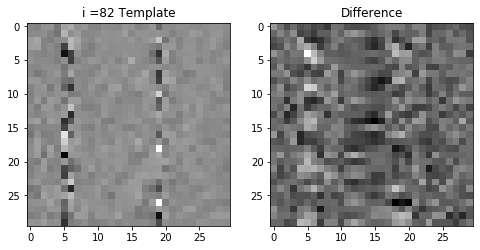

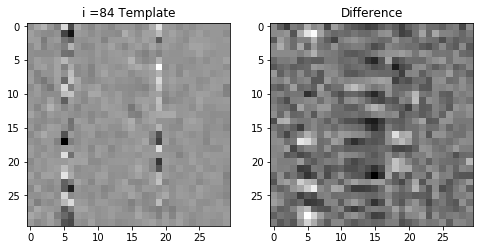

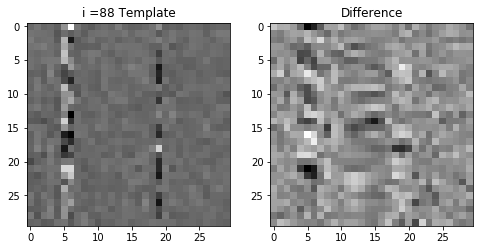

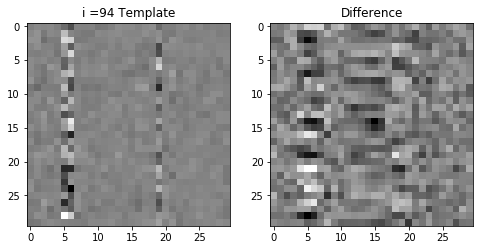

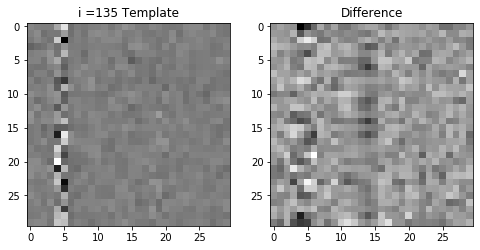

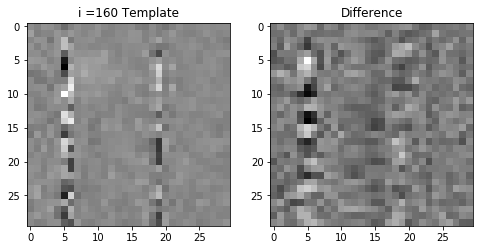

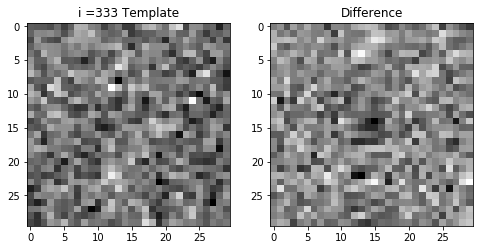

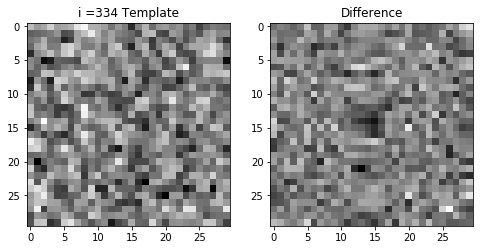

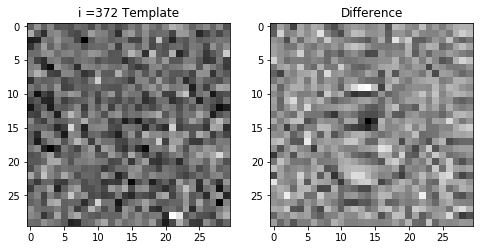

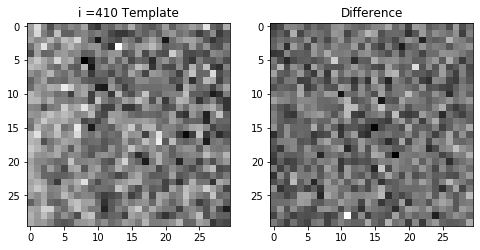

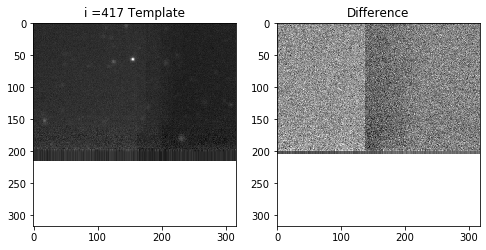

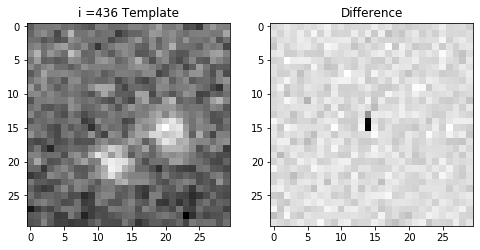

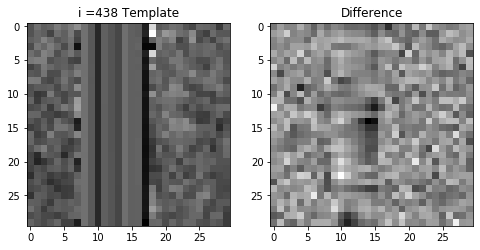

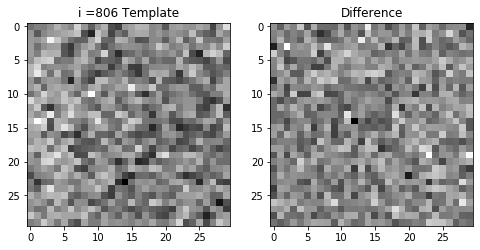

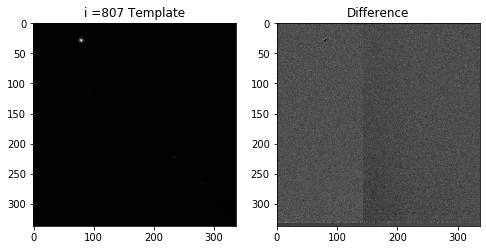

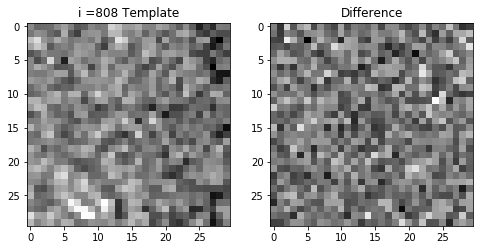

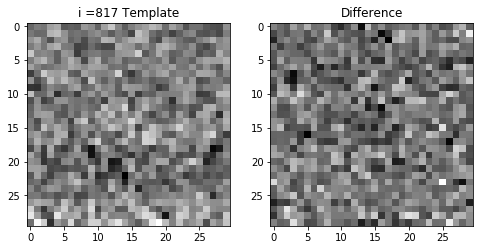

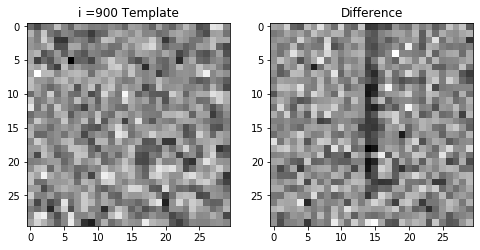

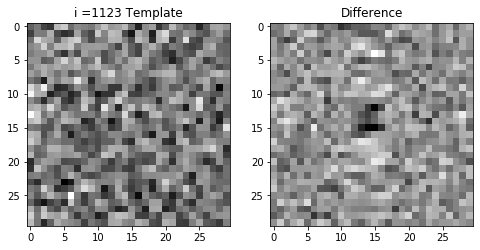

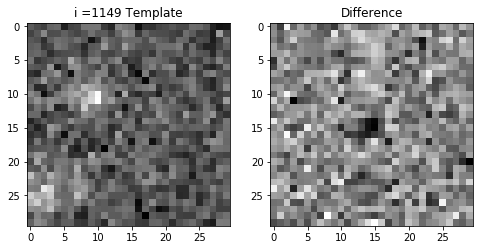

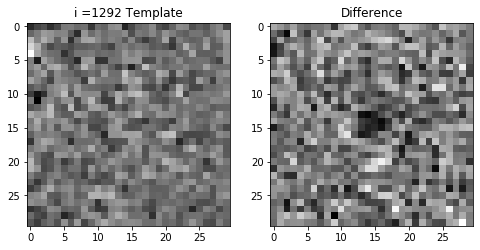

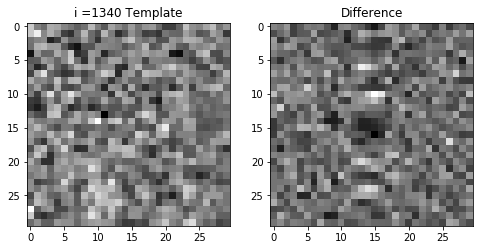

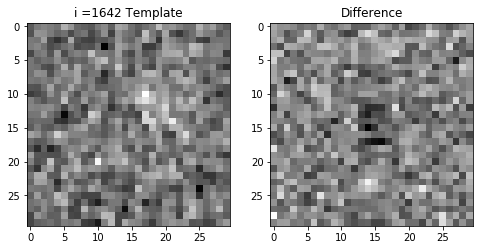

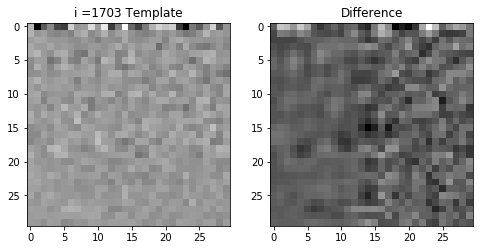

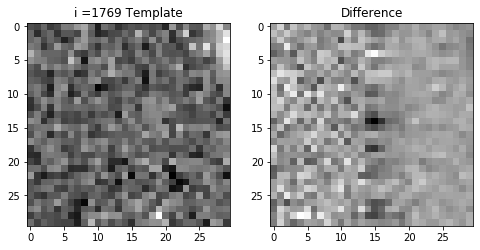

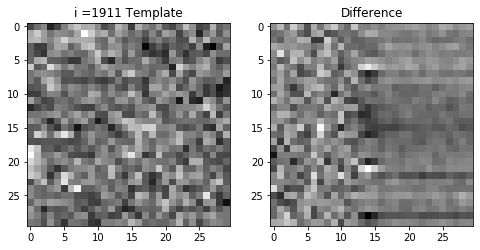

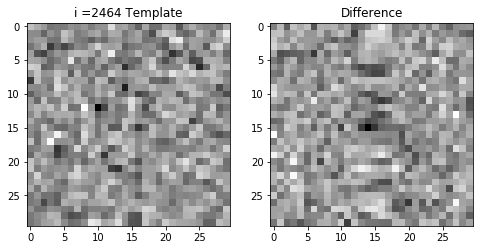

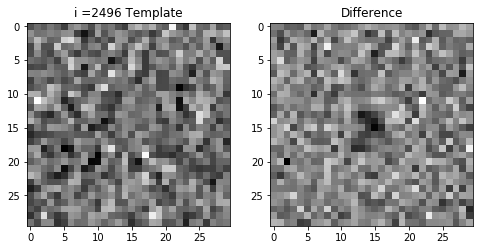

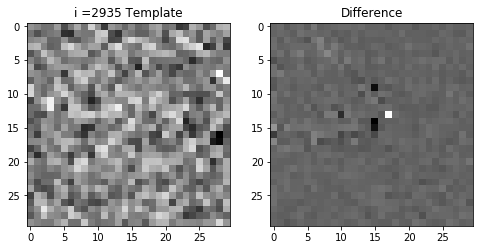

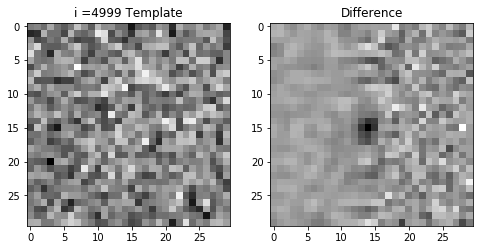

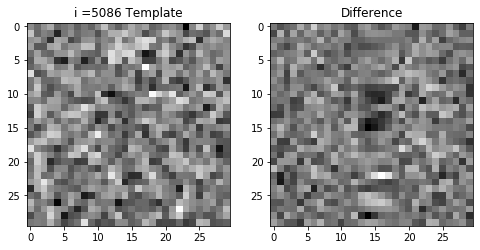

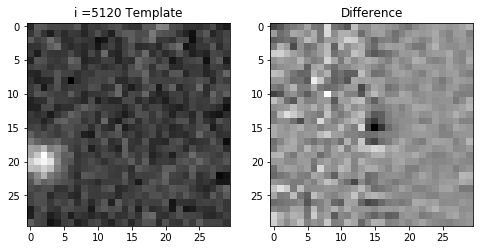

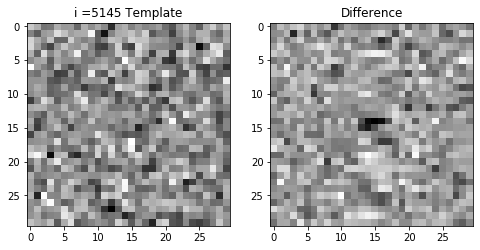

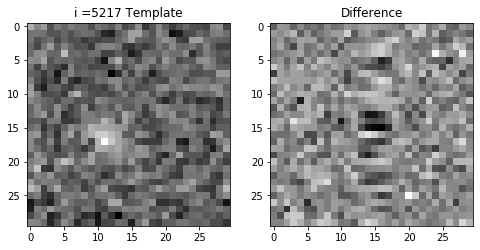

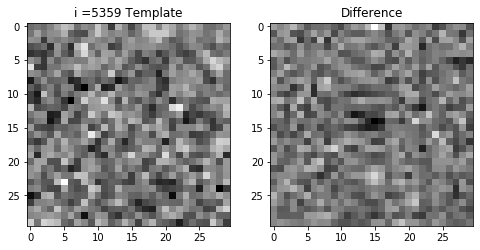

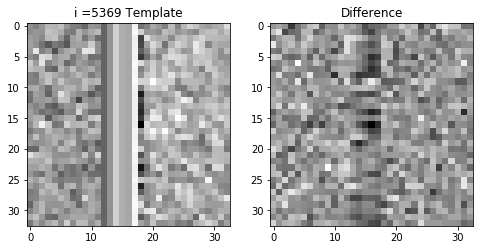

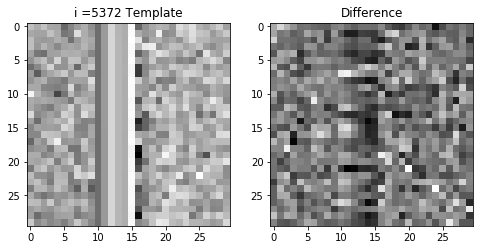

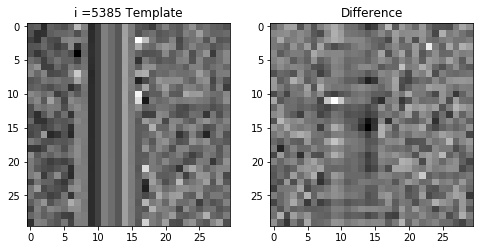

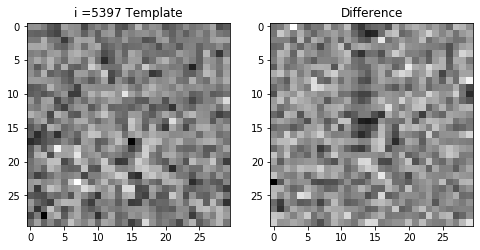

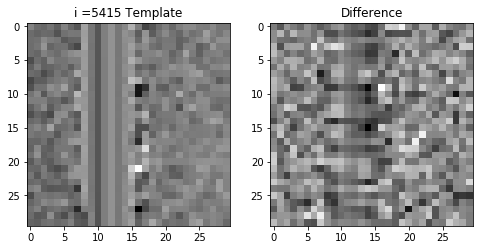

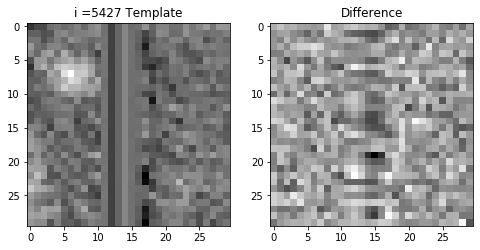

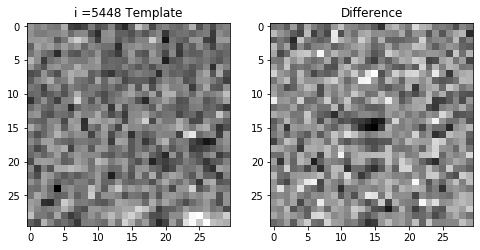

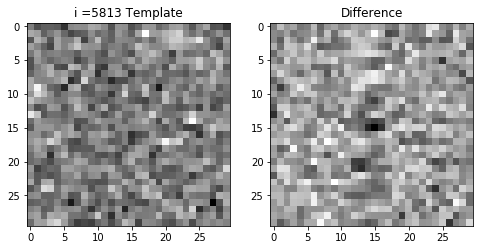

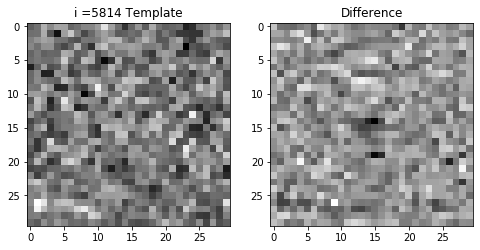

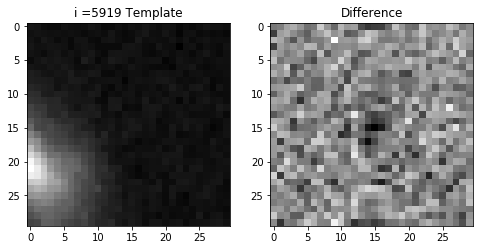

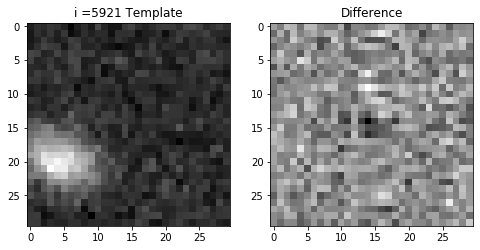

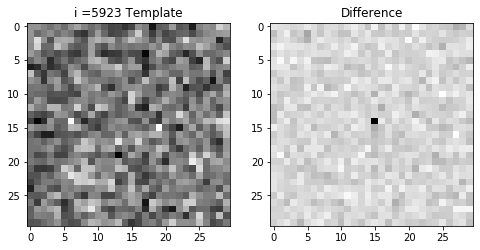

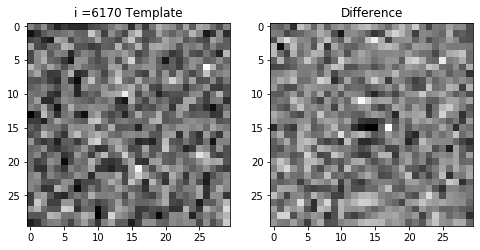

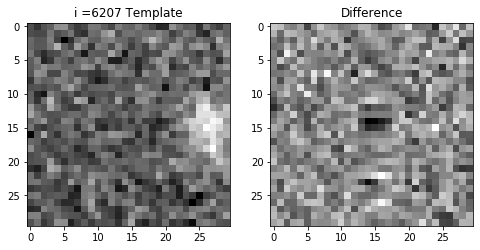

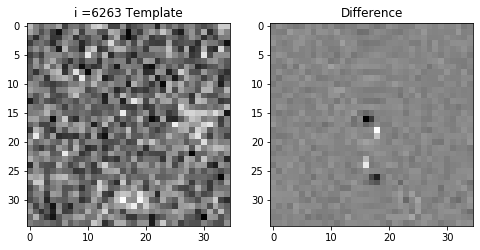

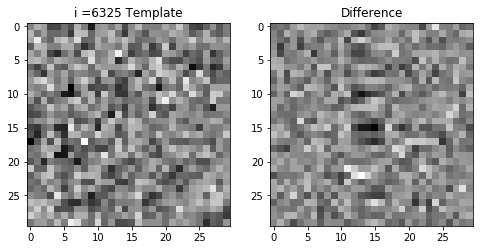

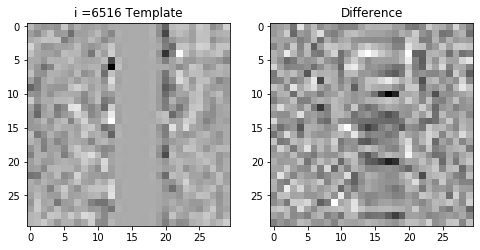

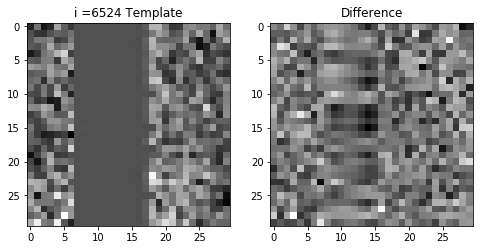

In [248]:
ssDF(dfSNRhigh, packetList)